In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
df.duplicated().sum()

0

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='price', ylabel='area'>

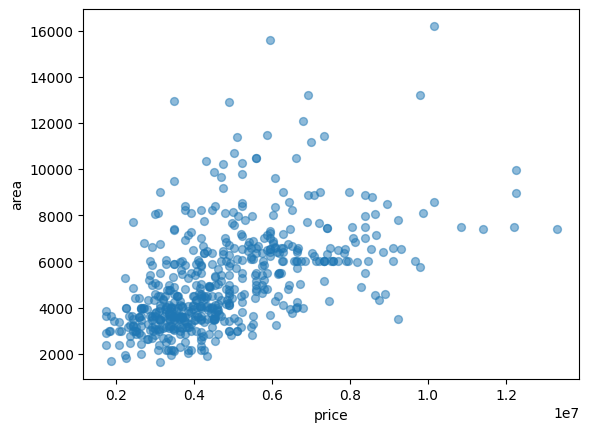

In [10]:
df.plot(kind='scatter', x='price', y='area', s=32, alpha=0.5)

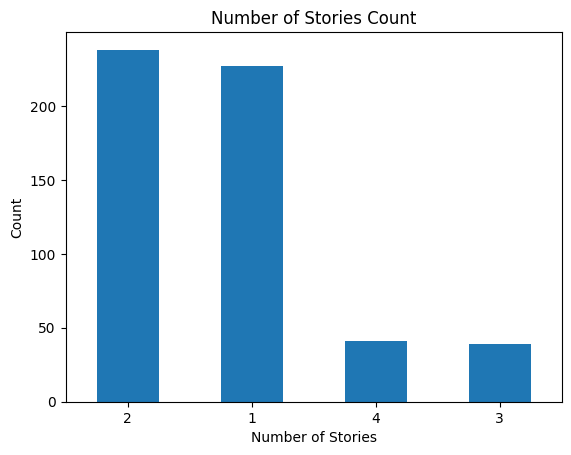

In [13]:
stories_count = df['stories'].value_counts()

stories_count.plot(kind='bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of Stories')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

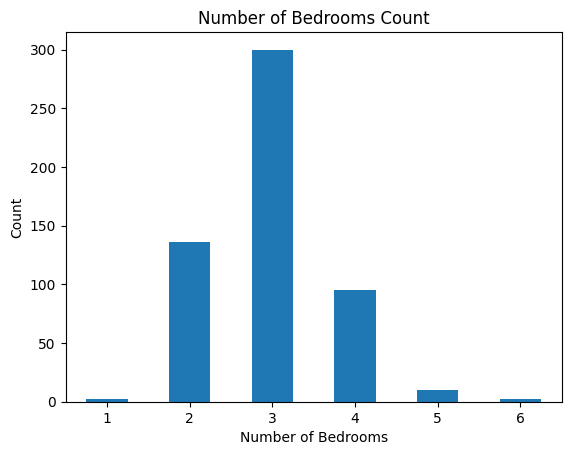

In [12]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count_sorted = bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

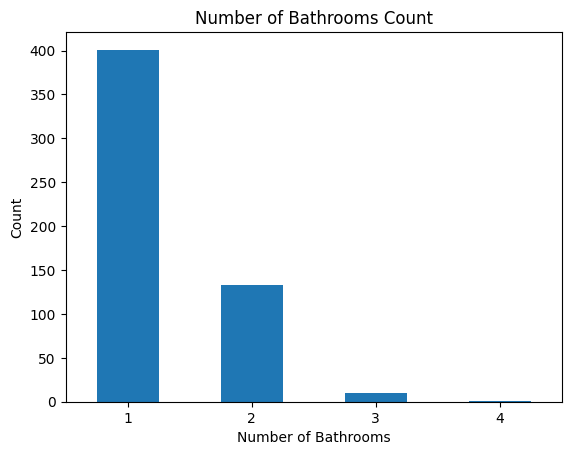

In [14]:
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count_sorted = bathrooms_count.sort_index()
bathrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bathrooms Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

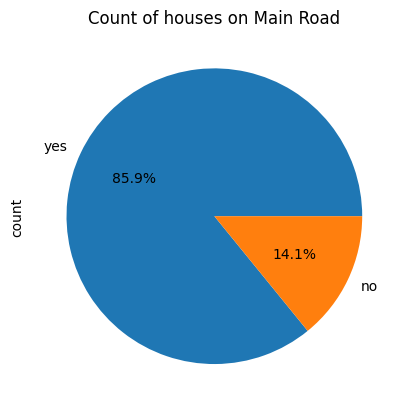

In [15]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of houses on Main Road')
plt.show()

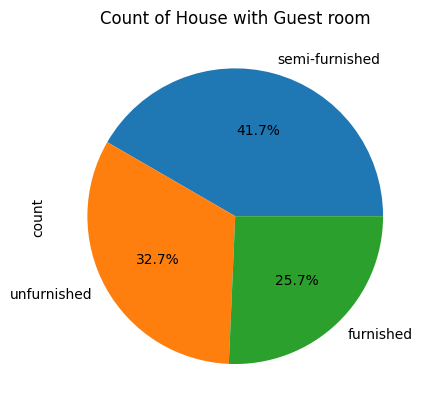

In [16]:
furnishingstatus_count = df['furnishingstatus'].value_counts()
furnishingstatus_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of House with Guest room')
plt.show()


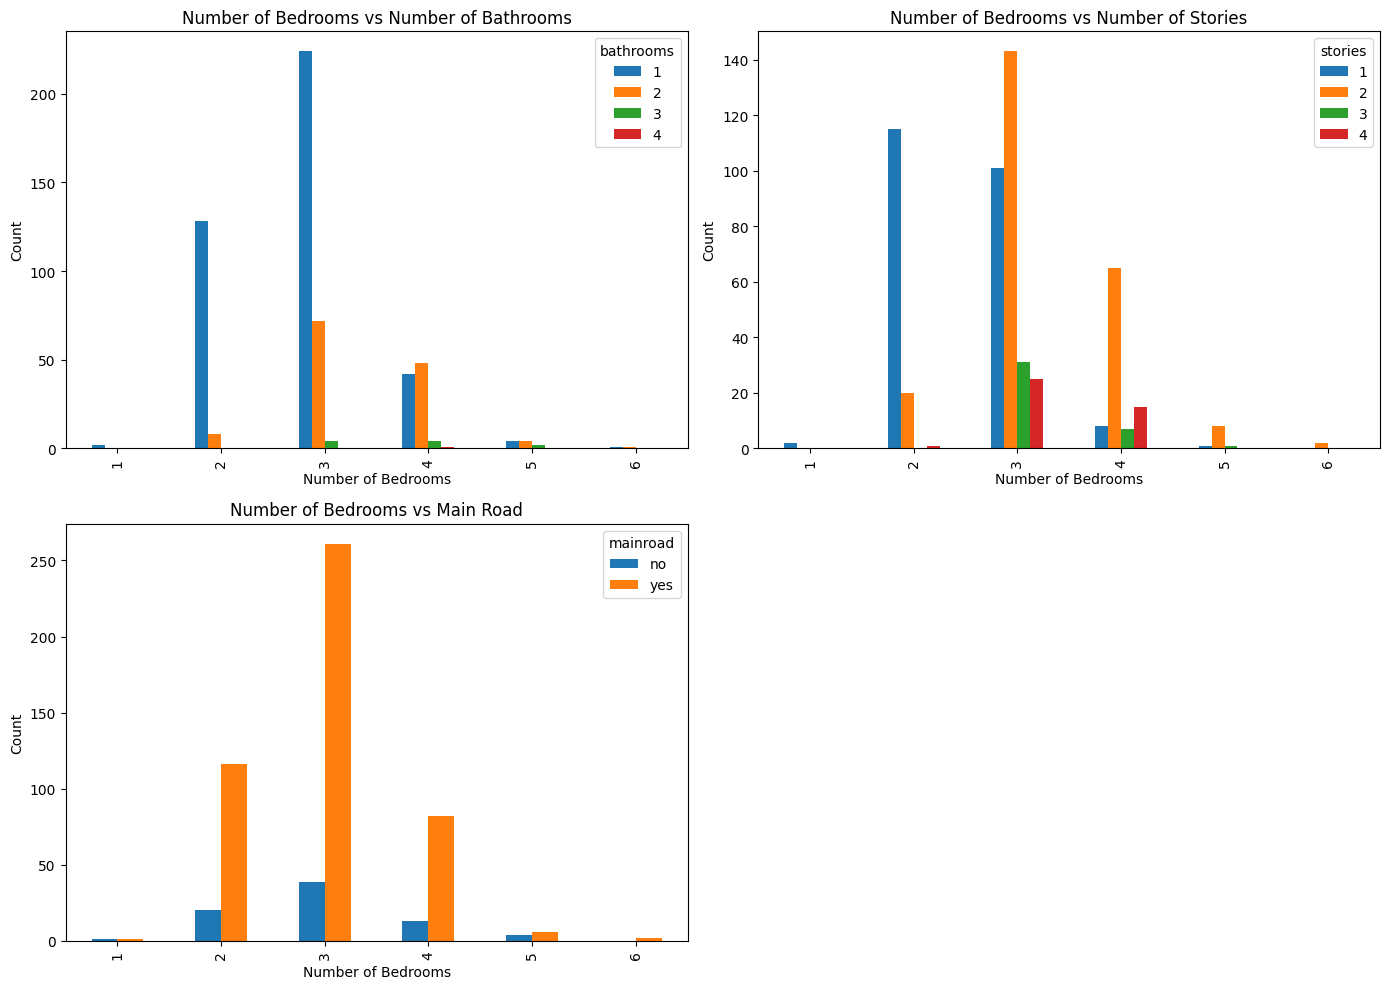

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
bedrooms_bathrooms = pd.crosstab(df['bedrooms'], df['bathrooms'])
bedrooms_bathrooms.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Number of Bedrooms vs Number of Bathrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')

bedrooms_stories = pd.crosstab(df['bedrooms'], df['stories'])
bedrooms_stories.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Number of Bedrooms vs Number of Stories')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Count')

bedrooms_mainroad = pd.crosstab(df['bedrooms'], df['mainroad'])
bedrooms_mainroad.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Number of Bedrooms vs Main Road')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Count')

axes[1, 1].axis('off')

plt.tight_layout()

In [20]:
encoder = LabelEncoder()

In [21]:
encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [22]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [27]:
x=df.drop(columns=['price'],axis = 1)
y=df['price']

In [28]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
ln_model = LinearRegression()
ln_model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = ln_model.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [35]:
mse

0.013281243729270737

In [36]:
mae

0.08482075249315932

In [37]:
ln_acc = r2_score(y_test, y_pred)
ln_acc

0.6494754192267794